In [1]:
%pylab inline
import MySQLdb
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
db = MySQLdb.connect('localhost','root','hawcfis05h','AMON_test2')

In [3]:
cursor = db.cursor()

In [4]:
cursor.execute("describe event")
cursor.fetchall()

(('eventStreamConfig_stream', 'int(11)', 'NO', 'PRI', None, ''),
 ('id', 'bigint(20)', 'NO', 'PRI', None, ''),
 ('rev', 'smallint(6)', 'NO', 'PRI', None, ''),
 ('time', 'datetime', 'YES', '', None, ''),
 ('time_msec', 'int(11)', 'YES', '', None, ''),
 ('Dec', 'float', 'YES', '', None, ''),
 ('RA', 'float', 'YES', '', None, ''),
 ('sigmaR', 'float', 'YES', '', None, ''),
 ('nevents', 'int(11)', 'YES', '', None, ''),
 ('deltaT', 'float', 'YES', '', None, ''),
 ('sigmaT', 'float', 'YES', '', None, ''),
 ('false_pos', 'float', 'YES', '', None, ''),
 ('pvalue', 'float', 'YES', '', None, ''),
 ('type',
  "set('observation','prediction','utility','test','sim')",
  'YES',
  '',
  None,
  ''),
 ('point_RA', 'float', 'YES', '', None, ''),
 ('point_Dec', 'float', 'YES', '', None, ''),
 ('longitude', 'float', 'YES', '', None, ''),
 ('latitude', 'float', 'YES', '', None, ''),
 ('elevation', 'float', 'YES', '', None, ''),
 ('psf_type', "set('skymap','fisher','king','kent')", 'YES', '', None, ''),
 (

In [5]:
cursor.execute("SELECT e.id,e.Dec, e.RA FROM event e where e.eventStreamConfig_stream=7")

84L

In [6]:
result = cursor.fetchall()

In [9]:
df = pd.DataFrame( [[ij for ij in i] for i in result] )
df = df.rename(columns={0:"ID",1:"Dec",2:"RA"})

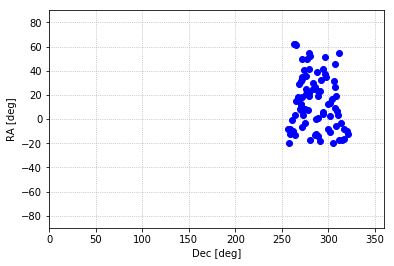

In [10]:
plot(df['RA'],df['Dec'],'bo')
xlim(0,360)
xlabel(r'Dec [deg]')
ylim(-90,90)
ylabel(r'RA [deg]')
grid(ls=':')

In [11]:
selection = '''
SELECT p.event_id, 
MAX(CASE WHEN p.name='rise_time_MJD' THEN p.value ELSE NULL END) AS `rise_time_MJD`,
MAX(CASE WHEN p.name='set_time_MJD' THEN p.value ELSE NULL END) AS `set_time_MJD`,
MAX(CASE WHEN p.name='signif' THEN p.value ELSE NULL END) AS 'signif'
FROM parameter p
WHERE p.event_eventStreamConfig_stream=7
GROUP BY p.event_id '''

cursor.execute(selection)
result = cursor.fetchall()

In [12]:
df2 = pd.DataFrame( [[ij for ij in i] for i in result] )
df2 = df2.rename(columns={0:"event_id",1:"rise_time",2:"set_time",3:'signif'})

(array([ 29.,  23.,  11.,   8.,   0.,   6.,   4.,   1.,   0.,   2.]),
 array([ 2.76 ,  2.886,  3.012,  3.138,  3.264,  3.39 ,  3.516,  3.642,
         3.768,  3.894,  4.02 ]),
 <a list of 1 Patch objects>)

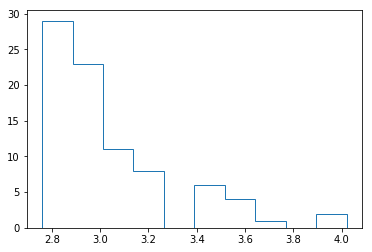

In [13]:
hist(df2['signif'],histtype='step')

In [24]:
newdf = pd.merge(df, df2, how='outer', left_on="ID", right_on='event_id')
newdf.drop('event_id', axis=1, inplace=True)

,ID,Dec,RA,rise_time,set_time,signif
0,0,15.33,265.65,57388.58361,57388.87377,2.96
1,1,-8.42,256.38,57388.58561,57388.82059,2.85
2,2,18.17,267.10,57388.58602,57388.87937,3.16
3,3,-0.71,261.12,57388.58650,57388.84595,3.04
4,4,29.40,268.81,57388.58751,57388.88726,2.79
5,5,3.32,264.64,57388.59125,57388.86065,3.18
6,6,17.39,268.95,57388.59154,57388.88409,2.78
7,7,-8.16,258.88,57388.59206,57388.82803,3.25
8,8,31.34,271.14,57388.59396,57388.89370,3.10
9,9,33.33,271.89,57388.59619,57388.89557,3.21
